In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
hist25 = xr.open_dataset("/g/data/eg3/ab4502/ESCI/barpac_m_ACCESS1-0_wind_gust_25_1985_2005.nc")
hist28 = xr.open_dataset("/g/data/eg3/ab4502/ESCI/barpac_m_ACCESS1-0_wind_gust_28.5_1985_2005.nc")
proj25 = xr.open_dataset("/g/data/eg3/ab4502/ESCI/barpac_m_ACCESS1-0_wind_gust_25_2039_2059.nc")
proj28 = xr.open_dataset("/g/data/eg3/ab4502/ESCI/barpac_m_ACCESS1-0_wind_gust_28.5_2039_2059.nc")
lsm = xr.open_dataset("/g/data/du7/barpa/trials/BARPAC-M_km2p2/static/lnd_mask-BARPAC-M_km2p2.nc")

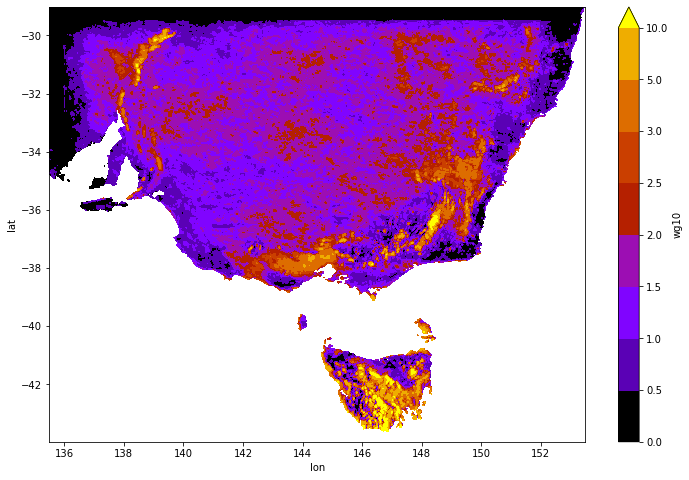

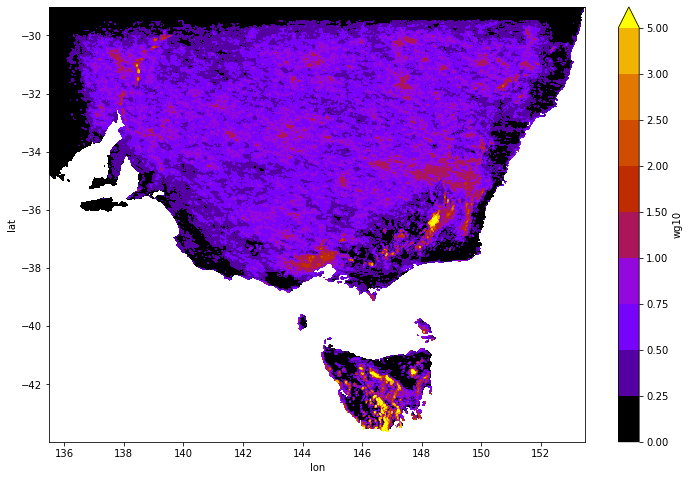

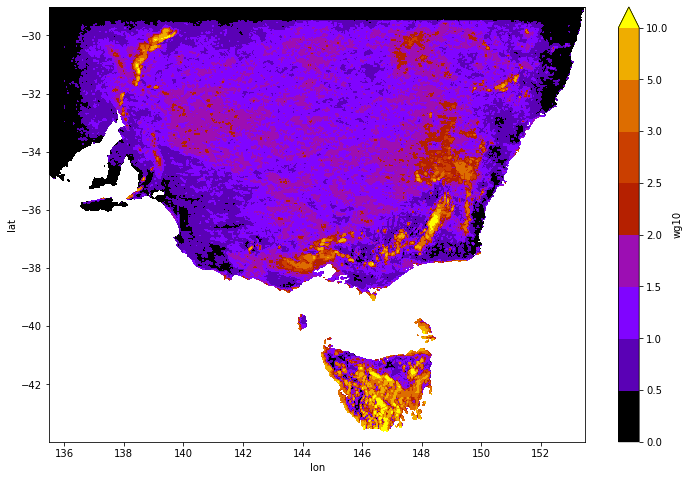

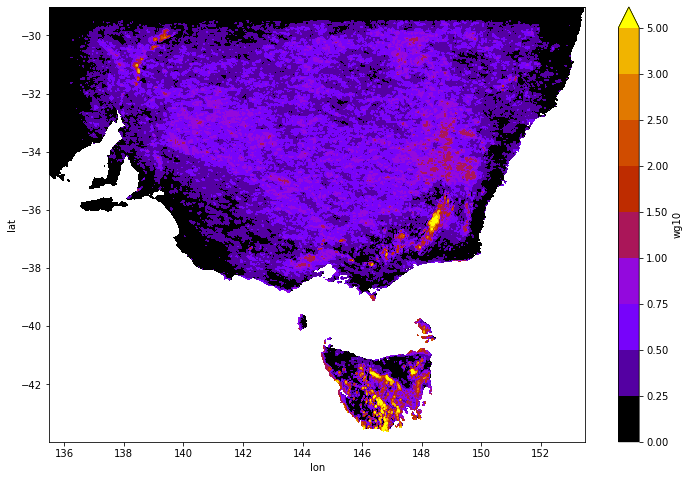

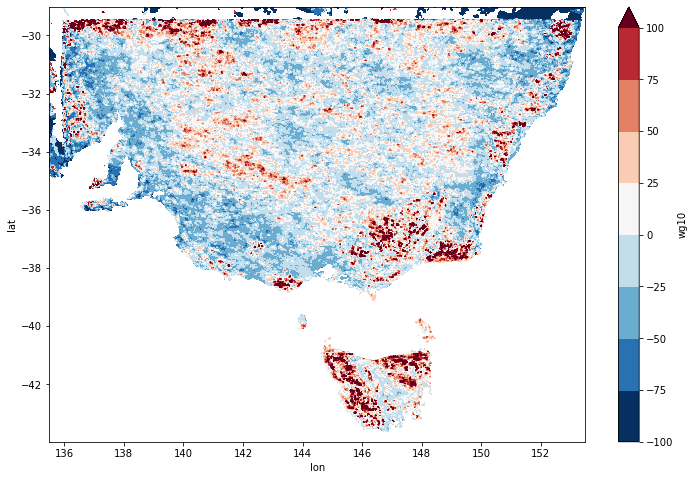

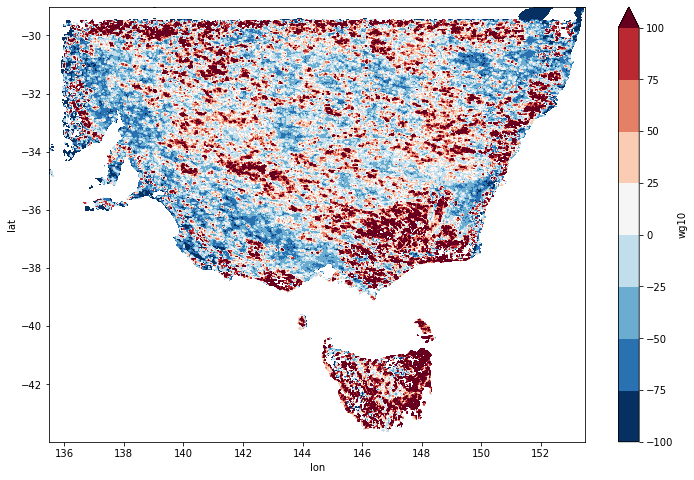

In [3]:
cmap = plt.get_cmap("gnuplot")

plt.figure(figsize=[12,8])
levs = np.array([0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.05, 0.1]) * 100
xr.plot.contourf(xr.where((lsm["lnd_mask"]==1).values, (hist25["wg10"] / hist25.days)*100, np.nan).sel({"lat":lsm.latitude.values>-44, "lon":lsm.longitude.values<153.5}), \
                         levels=levs, cmap=cmap)

plt.figure(figsize=[12,8])
levs = np.array([0, 0.0025, 0.005, 0.0075, 0.01, 0.015, 0.02, 0.025, 0.03, 0.05]) * 100
xr.plot.contourf(xr.where((lsm["lnd_mask"]==1).values, (hist28["wg10"] / hist28.days)*100, np.nan).sel({"lat":lsm.latitude.values>-44, "lon":lsm.longitude.values<153.5}), \
                         levels=levs, cmap=cmap)

plt.figure(figsize=[12,8])
levs = np.array([0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.05, 0.1]) * 100
xr.plot.contourf(xr.where((lsm["lnd_mask"]==1).values, (proj25["wg10"] / proj25.days)*100, np.nan).sel({"lat":lsm.latitude.values>-44, "lon":lsm.longitude.values<153.5}), \
                         levels=levs, cmap=cmap)

plt.figure(figsize=[12,8])
levs = np.array([0, 0.0025, 0.005, 0.0075, 0.01, 0.015, 0.02, 0.025, 0.03, 0.05]) * 100
xr.plot.contourf(xr.where((lsm["lnd_mask"]==1).values, (proj28["wg10"] / proj28.days)*100, np.nan).sel({"lat":lsm.latitude.values>-44, "lon":lsm.longitude.values<153.5}), \
                         levels=levs, cmap=cmap)

cmap = plt.get_cmap("RdBu_r")
plt.figure(figsize=[12,8])
levs = [-100,-75,-50,-25,0,25,50,75,100]
xr.plot.contourf(xr.where((lsm["lnd_mask"]==1).values, (proj25["wg10"]-hist25["wg10"])/hist25["wg10"] * 100, np.nan).sel({"lat":lsm.latitude.values>-44, "lon":lsm.longitude.values<153.5}), \
                         levels=levs, cmap=cmap)

plt.figure(figsize=[12,8])
xr.plot.contourf(xr.where((lsm["lnd_mask"]==1).values, (proj28["wg10"]-hist28["wg10"])/hist28["wg10"] * 100, np.nan).sel({"lat":lsm.latitude.values>-44, "lon":lsm.longitude.values<153.5}), \
                         levels=levs, cmap=cmap)

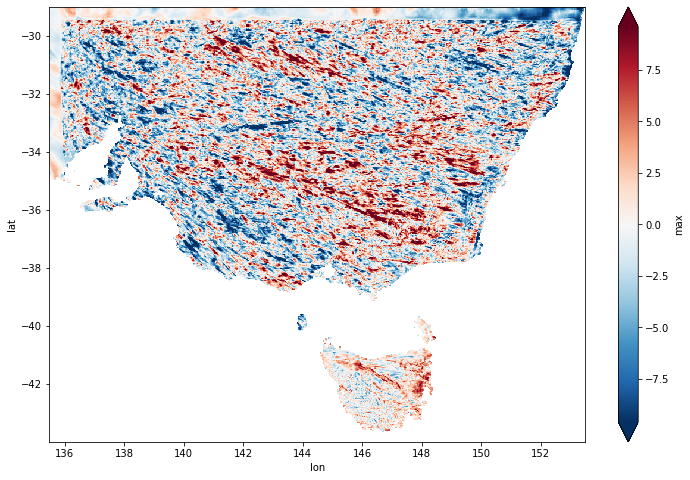

In [4]:
hist_max = xr.open_dataset("/g/data/eg3/ab4502/gev/barpac_m_access_cdf_djf_1985_2005.nc")["max"]
proj_max = xr.open_dataset("/g/data/eg3/ab4502/gev/barpac_m_access_cdf_djf_2039_2058.nc")["max"]
levs = [-12,-8,-4,0,4,8,12]
plt.figure(figsize=[12,8])
lsm2 = lsm.interp({"latitude":hist_max.lat, "longitude":hist_max.lon})
xr.plot.pcolormesh(xr.where((lsm2["lnd_mask"]==1).values, proj_max-hist_max, np.nan).sel({"lat":lsm2.latitude.values>-44, "lon":lsm2.longitude.values<153.5}), cmap=cmap, robust=True)

In [5]:
barpac = pd.read_pickle("/g/data/eg3/ab4502/ExtremeWind/points/barpac_m_access_gusts_1985_2005.pkl").drop_duplicates().set_index(["time","loc_id"]).rename(columns={"max_wndgust10m":"barpac"})
barpac2 = pd.read_pickle("/g/data/eg3/ab4502/ExtremeWind/points/barpac_m_access_gusts_2039_2058.pkl").drop_duplicates().set_index(["time","loc_id"]).rename(columns={"max_wndgust10m":"barpac2"})
barpa_r = pd.read_pickle("/g/data/eg3/ab4502/ExtremeWind/points/barpa_access_1985_2005.pkl").drop_duplicates().set_index(["time","loc_id"]).rename(columns={"max_wndgust10m":"barpa_r"})
obs = pd.read_pickle("/g/data/eg3/ab4502/ExtremeWind/obs/aws/all_daily_max_wind_gusts_6hrly_aus_1979_2017.pkl").drop_duplicates().set_index(["daily_date","stn_name"]).rename(columns={"wind_gust":"obs"})

barpac = barpac[np.in1d(pd.DatetimeIndex(barpac.reset_index().time).month, [12,1,2])]
barpac2 = barpac2[np.in1d(pd.DatetimeIndex(barpac2.reset_index().time).month, [12,1,2])]
barpa_r = barpa_r[np.in1d(pd.DatetimeIndex(barpa_r.reset_index().time).month, [12,1,2])]
obs = obs[np.in1d(pd.DatetimeIndex(obs.reset_index().daily_date).month, [12,1,2])]

temp=obs.reset_index()
temp=temp.loc[(np.in1d(temp.stn_name, barpac.reset_index().loc_id.unique())) & (np.in1d(temp.month,[12,1,2]))].dropna()

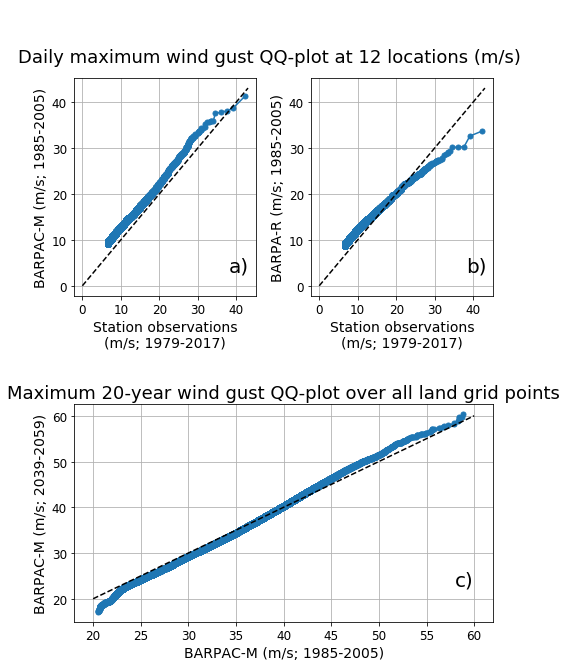

In [6]:
hist_max = xr.open_dataset("/g/data/eg3/ab4502/gev/barpac_m_access_cdf_djf_1985_2005.nc")["max"]
proj_max = xr.open_dataset("/g/data/eg3/ab4502/gev/barpac_m_access_cdf_djf_2039_2058.nc")["max"]

barpac = pd.read_pickle("/g/data/eg3/ab4502/ExtremeWind/points/barpac_m_access_gusts_1985_2005.pkl").drop_duplicates().set_index(["time","loc_id"]).rename(columns={"max_wndgust10m":"barpac"})
barpac2 = pd.read_pickle("/g/data/eg3/ab4502/ExtremeWind/points/barpac_m_access_gusts_2039_2058.pkl").drop_duplicates().set_index(["time","loc_id"]).rename(columns={"max_wndgust10m":"barpac2"})
barpa_r = pd.read_pickle("/g/data/eg3/ab4502/ExtremeWind/points/barpa_access_1985_2005.pkl").drop_duplicates().set_index(["time","loc_id"]).rename(columns={"max_wndgust10m":"barpa_r"})
obs = pd.read_pickle("/g/data/eg3/ab4502/ExtremeWind/obs/aws/all_daily_max_wind_gusts_6hrly_aus_1979_2017.pkl").drop_duplicates().set_index(["daily_date","stn_name"]).rename(columns={"wind_gust":"obs"})

barpac = barpac[np.in1d(pd.DatetimeIndex(barpac.reset_index().time).month, [12,1,2])]
barpac2 = barpac2[np.in1d(pd.DatetimeIndex(barpac2.reset_index().time).month, [12,1,2])]
barpa_r = barpa_r[np.in1d(pd.DatetimeIndex(barpa_r.reset_index().time).month, [12,1,2])]
obs = obs[np.in1d(pd.DatetimeIndex(obs.reset_index().daily_date).month, [12,1,2])]

temp=obs.reset_index()
temp=temp.loc[(np.in1d(temp.stn_name, barpac.reset_index().loc_id.unique())) & (np.in1d(temp.month,[12,1,2]))].dropna()

label=["OBS (m/s; 1990-2005)","BARPAC-M (m/s; 1985-2005)","BARPA-R (m/s; 1985-2005)","BARRA-R (1990-2005)","Station observations\n(m/s; 1979-2017)"]
plt.figure(figsize=[16,10])
plt.suptitle("\n\nDaily maximum wind gust QQ-plot at 12 locations (m/s)", fontsize=18)
plt.subplot2grid((2,4),(0,1))
plt.plot(np.percentile(temp["obs"].values,np.logspace(0,2,100000), interpolation="nearest"), np.percentile(barpac["barpac"].values,np.logspace(0,2,100000), interpolation="nearest"), marker="o", ms=5)
plt.plot([0,43],[0,43], "k--"); plt.ylabel(label[1], fontsize=14); plt.xlabel(label[4], fontsize=14)
plt.gca().grid()
plt.text(38,3,"a)",size=20)
plt.gca().tick_params("both",labelsize=12)

plt.subplot2grid((2,4),(0,2))
plt.plot(np.percentile(temp["obs"].values,np.logspace(0,2,100000), interpolation="nearest"), np.percentile(barpa_r["barpa_r"].values,np.logspace(0,2,100000), interpolation="nearest"), marker="o", ms=5)
plt.plot([0,43],[0,43], "k--"); plt.ylabel(label[2], fontsize=14); plt.xlabel(label[4], fontsize=14)
plt.gca().grid()
plt.text(38,3,"b)",size=20)
plt.gca().tick_params("both",labelsize=12)

plt.subplot2grid((2,4),(1,1),colspan=2)
x=xr.where((lsm2["lnd_mask"]==1).values, hist_max, np.nan).sel({"lat":lsm2.latitude.values>-44, "lon":lsm2.longitude.values<153.5}).values.flatten()
x=x[~np.isnan(x)]
y=xr.where((lsm2["lnd_mask"]==1).values, proj_max, np.nan).sel({"lat":lsm2.latitude.values>-44, "lon":lsm2.longitude.values<153.5}).values.flatten()
y=y[~np.isnan(y)]
plt.plot(np.sort(x), np.sort(y), marker="o", ms=5)
plt.plot([20,60],[20,60],"k--")
plt.text(58,23,"c)",size=20)
plt.title("Maximum 20-year wind gust QQ-plot over all land grid points", fontsize=18)
plt.xlabel("BARPAC-M (m/s; 1985-2005)", fontsize=14)
plt.ylabel("BARPAC-M (m/s; 2039-2059)", fontsize=14)
plt.gca().grid()
plt.gca().tick_params("both",labelsize=12)

plt.subplots_adjust(hspace=0.5,wspace=0.3)

plt.savefig("/g/data/eg3/ab4502/figs/barpa/barpac_wg.png", bbox_inches="tight")

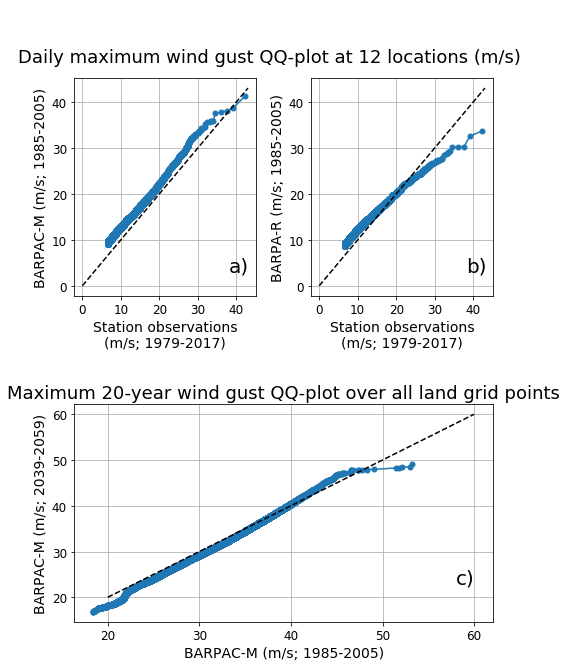

In [10]:
hist_max = xr.open_dataset("/g/data/eg3/ab4502/gev/barpac_m_access_cdf_djf_1985_2005.nc")["ari10"]
proj_max = xr.open_dataset("/g/data/eg3/ab4502/gev/barpac_m_access_cdf_djf_2039_2058.nc")["ari10"]

barpac = pd.read_pickle("/g/data/eg3/ab4502/ExtremeWind/points/barpac_m_access_gusts_1985_2005.pkl").drop_duplicates().set_index(["time","loc_id"]).rename(columns={"max_wndgust10m":"barpac"})
barpac2 = pd.read_pickle("/g/data/eg3/ab4502/ExtremeWind/points/barpac_m_access_gusts_2039_2058.pkl").drop_duplicates().set_index(["time","loc_id"]).rename(columns={"max_wndgust10m":"barpac2"})
barpa_r = pd.read_pickle("/g/data/eg3/ab4502/ExtremeWind/points/barpa_access_1985_2005.pkl").drop_duplicates().set_index(["time","loc_id"]).rename(columns={"max_wndgust10m":"barpa_r"})
obs = pd.read_pickle("/g/data/eg3/ab4502/ExtremeWind/obs/aws/all_daily_max_wind_gusts_6hrly_aus_1979_2017.pkl").drop_duplicates().set_index(["daily_date","stn_name"]).rename(columns={"wind_gust":"obs"})

barpac = barpac[np.in1d(pd.DatetimeIndex(barpac.reset_index().time).month, [12,1,2])]
barpac2 = barpac2[np.in1d(pd.DatetimeIndex(barpac2.reset_index().time).month, [12,1,2])]
barpa_r = barpa_r[np.in1d(pd.DatetimeIndex(barpa_r.reset_index().time).month, [12,1,2])]
obs = obs[np.in1d(pd.DatetimeIndex(obs.reset_index().daily_date).month, [12,1,2])]

temp=obs.reset_index()
temp=temp.loc[(np.in1d(temp.stn_name, barpac.reset_index().loc_id.unique())) & (np.in1d(temp.month,[12,1,2]))].dropna()

label=["OBS (m/s; 1990-2005)","BARPAC-M (m/s; 1985-2005)","BARPA-R (m/s; 1985-2005)","BARRA-R (1990-2005)","Station observations\n(m/s; 1979-2017)"]
plt.figure(figsize=[16,10])
plt.suptitle("\n\nDaily maximum wind gust QQ-plot at 12 locations (m/s)", fontsize=18)
plt.subplot2grid((2,4),(0,1))
plt.plot(np.percentile(temp["obs"].values,np.logspace(0,2,100000), interpolation="nearest"), np.percentile(barpac["barpac"].values,np.logspace(0,2,100000), interpolation="nearest"), marker="o", ms=5)
plt.plot([0,43],[0,43], "k--"); plt.ylabel(label[1], fontsize=14); plt.xlabel(label[4], fontsize=14)
plt.gca().grid()
plt.text(38,3,"a)",size=20)
plt.gca().tick_params("both",labelsize=12)

plt.subplot2grid((2,4),(0,2))
plt.plot(np.percentile(temp["obs"].values,np.logspace(0,2,100000), interpolation="nearest"), np.percentile(barpa_r["barpa_r"].values,np.logspace(0,2,100000), interpolation="nearest"), marker="o", ms=5)
plt.plot([0,43],[0,43], "k--"); plt.ylabel(label[2], fontsize=14); plt.xlabel(label[4], fontsize=14)
plt.gca().grid()
plt.text(38,3,"b)",size=20)
plt.gca().tick_params("both",labelsize=12)

plt.subplot2grid((2,4),(1,1),colspan=2)
x=xr.where((lsm2["lnd_mask"]==1).values, hist_max, np.nan).sel({"lat":lsm2.latitude.values>-44, "lon":lsm2.longitude.values<153.5}).values.flatten()
x=x[~np.isnan(x)]
y=xr.where((lsm2["lnd_mask"]==1).values, proj_max, np.nan).sel({"lat":lsm2.latitude.values>-44, "lon":lsm2.longitude.values<153.5}).values.flatten()
y=y[~np.isnan(y)]
plt.plot(np.sort(x), np.sort(y), marker="o", ms=5)
plt.plot([20,60],[20,60],"k--")
plt.text(58,23,"c)",size=20)
plt.title("Maximum 20-year wind gust QQ-plot over all land grid points", fontsize=18)
plt.xlabel("BARPAC-M (m/s; 1985-2005)", fontsize=14)
plt.ylabel("BARPAC-M (m/s; 2039-2059)", fontsize=14)
plt.gca().grid()
plt.gca().tick_params("both",labelsize=12)

plt.subplots_adjust(hspace=0.5,wspace=0.3)

plt.savefig("/g/data/eg3/ab4502/figs/barpa/barpac_wg.png", bbox_inches="tight")

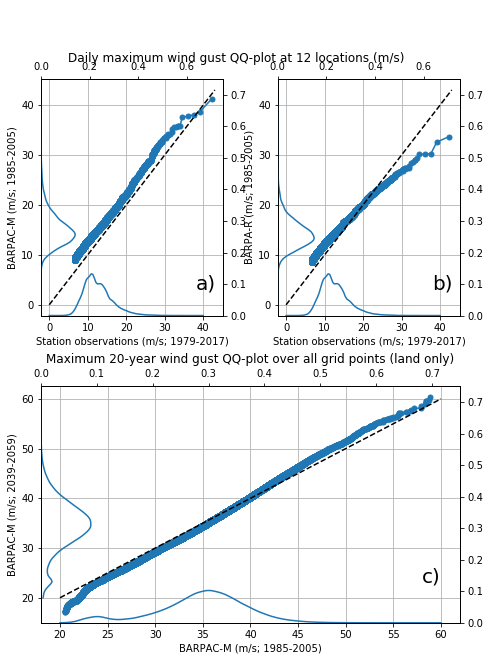

In [7]:
from scipy.stats import gaussian_kde

label=["OBS (m/s; 1990-2005)","BARPAC-M (m/s; 1985-2005)","BARPA-R (m/s; 1985-2005)","BARRA-R (1990-2005)","Station observations (m/s; 1979-2017)"]
plt.figure(figsize=[16,10])
plt.suptitle("\n\n\nDaily maximum wind gust QQ-plot at 12 locations (m/s)")
plt.subplot2grid((2,4),(0,1))
plt.plot(np.percentile(temp["obs"].values,np.logspace(0,2,100000), interpolation="nearest"), np.percentile(barpac["barpac"].values,np.logspace(0,2,100000), interpolation="nearest"), marker="o", ms=5)
plt.plot([0,43],[0,43], "k--"); plt.ylabel(label[1]); plt.xlabel(label[4])
plt.gca().grid()
plt.text(38,3,"a)",size=20)
ax1=plt.gca()
kde=gaussian_kde(temp["obs"].values)
ax2=plt.gca().twinx()
ax2.plot(np.linspace(0,40,100),kde.pdf(np.linspace(0,40,100)))
ax2.set_ylim([0,0.75])
kde=gaussian_kde(barpac["barpac"].values)
ax3=ax1.twiny()
ax3.plot(kde.pdf(np.linspace(0,40,100)), np.linspace(0,40,100))
ax3.set_xlim([0,0.75])


plt.subplot2grid((2,4),(0,2))
plt.plot(np.percentile(temp["obs"].values,np.logspace(0,2,100000), interpolation="nearest"), np.percentile(barpa_r["barpa_r"].values,np.logspace(0,2,100000), interpolation="nearest"), marker="o", ms=5)
plt.plot([0,43],[0,43], "k--"); plt.ylabel(label[2]); plt.xlabel(label[4])
plt.gca().grid()
plt.text(38,3,"b)",size=20)
ax1=plt.gca()
kde=gaussian_kde(temp["obs"].values)
ax2=plt.gca().twinx()
ax2.plot(np.linspace(0,40,100),kde.pdf(np.linspace(0,40,100)))
ax2.set_ylim([0,0.75])
kde=gaussian_kde(barpa_r["barpa_r"].values)
ax3=ax1.twiny()
ax3.plot(kde.pdf(np.linspace(0,40,100)), np.linspace(0,40,100))
ax3.set_xlim([0,0.75])

plt.subplot2grid((2,4),(1,1),colspan=2)
x=xr.where((lsm2["lnd_mask"]==1).values, hist_max, np.nan).sel({"lat":lsm2.latitude.values>-44, "lon":lsm2.longitude.values<153.5}).values.flatten()
x=x[~np.isnan(x)]
y=xr.where((lsm2["lnd_mask"]==1).values, proj_max, np.nan).sel({"lat":lsm2.latitude.values>-44, "lon":lsm2.longitude.values<153.5}).values.flatten()
y=y[~np.isnan(y)]
plt.plot(np.sort(x), np.sort(y), marker="o", ms=5)
plt.plot([20,60],[20,60],"k--")
plt.text(58,23,"c)",size=20)
plt.title("Maximum 20-year wind gust QQ-plot over all grid points (land only)")
plt.xlabel("BARPAC-M (m/s; 1985-2005)")
plt.ylabel("BARPAC-M (m/s; 2039-2059)")
plt.gca().grid()


ax1=plt.gca()
kde=gaussian_kde(x)
ax2=plt.gca().twinx()
ax2.plot(np.linspace(20,60,100),kde.pdf(np.linspace(20,60,100)))
ax2.set_ylim([0,0.75])

kde=gaussian_kde(y)
ax3=ax1.twiny()
ax3.plot(kde.pdf(np.linspace(20,60,100)), np.linspace(20,60,100))
ax3.set_xlim([0,0.75])

plt.subplots_adjust(hspace=0.3,wspace=0.3)

plt.savefig("/g/data/eg3/ab4502/figs/barpa/barpac_wg.png", bbox_inches="tight")

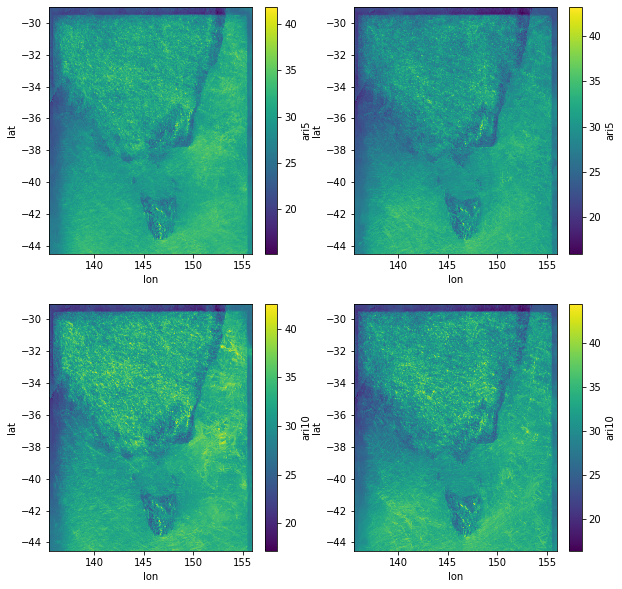

In [24]:
plt.figure(figsize=[10,10])
hist_max = xr.open_dataset("/g/data/eg3/ab4502/gev/barpac_m_access_cdf_djf_1985_2005_annmax.nc")["ari5"]
proj_max = xr.open_dataset("/g/data/eg3/ab4502/gev/barpac_m_access_cdf_djf_2039_2058_annmax.nc")["ari5"]
plt.subplot(2,2,1); hist_max.plot(); plt.subplot(2,2,2); proj_max.plot()
hist_max = xr.open_dataset("/g/data/eg3/ab4502/gev/barpac_m_access_cdf_djf_1985_2005_annmax.nc")["ari10"]
proj_max = xr.open_dataset("/g/data/eg3/ab4502/gev/barpac_m_access_cdf_djf_2039_2058_annmax.nc")["ari10"]
plt.subplot(2,2,3); hist_max.plot(); plt.subplot(2,2,4); proj_max.plot()

In [27]:
xr.open_dataset("/g/data/eg3/ab4502/gev/barpac_m_access_cdf_djf

<xarray.Dataset>
Dimensions:  (lat: 776, lon: 1024)
Coordinates:
  * lat      (lat) float32 -44.52 -44.5 -44.48 ... -29.06 -29.039999 -29.02
  * lon      (lon) float32 135.5 135.52 135.54 ... 155.92 155.94 155.95999
Data variables:
    ari5     (lat, lon) float64 ...
    ari10    (lat, lon) float64 ...
    ari20    (lat, lon) float64 ...
    max      (lat, lon) float64 ...